Total data counts:  6568
Stop data counts:  0 , ratio(%):  0.0
Left data counts:  848 , ratio(%):  12.9
strait data counts:  4829 , ratio(%):  73.5
Right data counts:  297 , ratio(%):  4.5
Up Left data counts:  353 , ratio(%):  5.4
Up Right data counts:  241 , ratio(%):  3.7
filename : ../dataset/20200512/1-original/img_2020-05-12_17-55-32_620.jpg
direction key you pressed : Forward


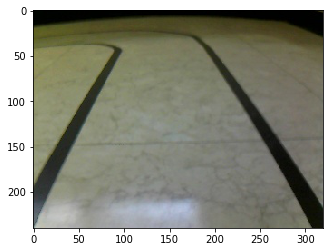

filename : ../dataset/20200512/1-original/img_2020-05-12_18-32-29_1850.jpg
direction key you pressed : Forward


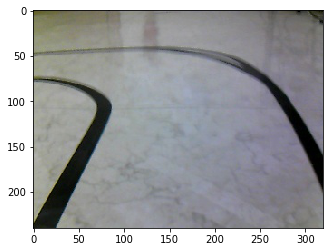

filename : ../dataset/20200512/1-original/img_2020-05-12_18-32-22_1797.jpg
direction key you pressed : Forward


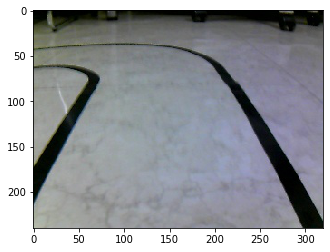

filename : ../dataset/20200512/1-original/img_2020-05-12_18-31-06_1150.jpg
direction key you pressed : Left


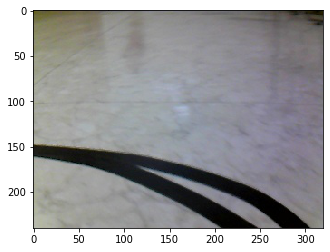

filename : ../dataset/20200512/1-original/img_2020-05-12_18-00-27_3101.jpg
direction key you pressed : Forward


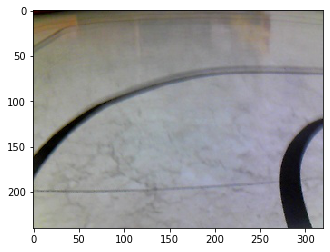

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


"""
- 수집한 데이터 중에서는 필요없거나 또는 잘못된 데이터가 있을 수 있음.
- 따라서, 수집한 데이터를 살펴보고 그 중에서 불필요한 데이터는 삭제하고 시작하기

<20200408 데이터셋>
- img_2020-04-08_15-42-38_0.jpg 부터 img_2020-04-08_15-42-40_23.jpg 까지, 
  총 24개의 처음 데이터를 버리기 (cvs 파일에서 관련된 데이터를 같이 삭제해야 함)
- 24개의 이미지를 삭제한 이후에 남은 이미지 수는 6825개 인데, 해당 24개 항목을 삭제하기도 전에
  cvs 파일에 기록된 row 수는 6549 임 => 불일치 되는 부분을 찾아서 제거하기
- img_2020-04-08_15-49-14_3307.jpg 이후에 일정 기간동안은 이미지는 있는데 cvs 파일에 기록은 없음
주의:

"""


# In[2]:


# 데이터를 import 하고, 통계를 내 보자 : 각 방향별로 몇개의 데이터가 있는지...
# 기본으로 제공되는 data_analysis.py 파일에서 시작

import scipy.misc
import random
import csv
import numpy as np
import config as cfg  # config.py 라는 소스코드 내용을 불러오는 것.
import matplotlib.pyplot as pplot
import matplotlib.image as image


# In[3]:


xs = []  # 촬영한 이미지의 이름 및 경로를 저장할 버퍼
ys = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[4]:


# 각 방향키 별로 몇개의 데이터가 있는지를 카운트?
wheel0zero = 0
wheel1left = 0
wheel2up = 0
wheel3right = 0
wheel4upleft = 0
wheel5upright = 0

# In[5]:


# data.csv 파일 읽어오기

#with open('data/' + cfg.currentDir + '/data.csv', newline='') as csvfile:
original_path = '../dataset/20200512/1-original'
with open(original_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        xs.append(original_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        ys.append(int(row[1]))
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            wheel0zero += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            wheel1left += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            wheel2up += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            wheel3right += 1
        elif int(row[1]) == cfg.UP_LEFT:  # 4 : 직좌
            wheel4upleft += 1
        elif int(row[1]) == cfg.UP_RIGHT:  # 5 = 직우
            wheel5upright += 1
        else:
            assert False, 'not supported'  


# In[6]:


# 통계 출력하기

print('Total data counts: ', len(xs))
print('Stop data counts: ', wheel0zero, ', ratio(%):', ' %0.1f' % (wheel0zero/len(xs)*100))
print('Left data counts: ', wheel1left, ', ratio(%):', ' %0.1f' % (wheel1left/len(xs)*100))
print('strait data counts: ', wheel2up, ', ratio(%):', ' %0.1f' % (wheel2up/len(xs)*100))
print('Right data counts: ', wheel3right, ', ratio(%):', ' %0.1f' % (wheel3right/len(xs)*100))
print('Up Left data counts: ', wheel4upleft, ', ratio(%):', ' %0.1f' % (wheel4upleft/len(xs)*100))
print('Up Right data counts: ', wheel5upright, ', ratio(%):', ' %0.1f' % (wheel5upright/len(xs)*100))


# In[7]:


# 사용자가 입력한 방향키 숫자를 문자열로 바꿔주는 함수
# 사용자가 입력한 방향키 몇개를 화면에 출력할건데, 그때 사용할 함수
def getDirectionString(dir):
    if dir == cfg.STOP:  # 0 정지!!!
        return 'Stop'
    elif dir == cfg.LEFT:  # 1 = 좌회전
        return 'Left'
    elif int(row[1]) == cfg.UP:  # 2 = 전진
        return 'Forward'
    elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
        return 'Right'
    elif int(row[1]) == cfg.UP_LEFT:
        return 'Up Left'
    elif int(row[1]) == cfg.UP_RIGHT:
        return 'Up Right'
    return 'Error'

#matplotlib inline

# In[8]:
numOfSamplesToPrint = 5
for _ in range(numOfSamplesToPrint):
# 샘플 데이터 출력 : 1
    ind = random.randint(1, len(xs))
    file_name = xs[ind]
    direction = ys[ind]
    print('filename : ' + file_name)
    print('direction key you pressed : ' + getDirectionString(direction))

    img = image.imread(file_name)
    pplot.imshow(img)
    pplot.show()

    






Total data counts:  3674
Stop data counts:  0 , ratio(%):  0.0
Left data counts:  392 , ratio(%):  10.7
strait data counts:  2718 , ratio(%):  74.0
Right data counts:  127 , ratio(%):  3.5
Up Left data counts:  315 , ratio(%):  8.6
Up Right data counts:  122 , ratio(%):  3.3
filename : ../dataset/20200513/1-original/img_2020-05-13_18-46-13_3061.jpg
direction key you pressed : Left


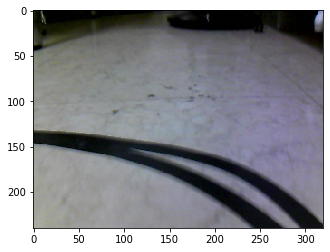

filename : ../dataset/20200513/1-original/img_2020-05-13_18-45-44_2817.jpg
direction key you pressed : Forward


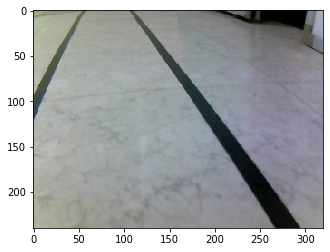

filename : ../dataset/20200513/1-original/img_2020-05-13_18-40-48_327.jpg
direction key you pressed : Forward


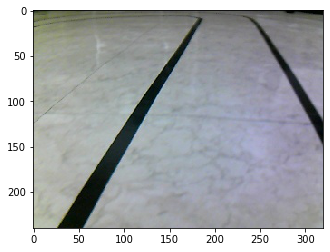

filename : ../dataset/20200513/1-original/img_2020-05-13_18-47-14_3576.jpg
direction key you pressed : Forward


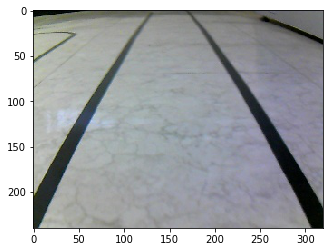

filename : ../dataset/20200513/1-original/img_2020-05-13_18-43-35_1727.jpg
direction key you pressed : Forward


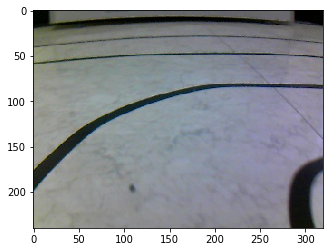

In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


"""
- 수집한 데이터 중에서는 필요없거나 또는 잘못된 데이터가 있을 수 있음.
- 따라서, 수집한 데이터를 살펴보고 그 중에서 불필요한 데이터는 삭제하고 시작하기

<20200408 데이터셋>
- img_2020-04-08_15-42-38_0.jpg 부터 img_2020-04-08_15-42-40_23.jpg 까지, 
  총 24개의 처음 데이터를 버리기 (cvs 파일에서 관련된 데이터를 같이 삭제해야 함)
- 24개의 이미지를 삭제한 이후에 남은 이미지 수는 6825개 인데, 해당 24개 항목을 삭제하기도 전에
  cvs 파일에 기록된 row 수는 6549 임 => 불일치 되는 부분을 찾아서 제거하기
- img_2020-04-08_15-49-14_3307.jpg 이후에 일정 기간동안은 이미지는 있는데 cvs 파일에 기록은 없음
주의:

"""


# In[2]:


# 데이터를 import 하고, 통계를 내 보자 : 각 방향별로 몇개의 데이터가 있는지...
# 기본으로 제공되는 data_analysis.py 파일에서 시작

import scipy.misc
import random
import csv
import numpy as np
import config as cfg  # config.py 라는 소스코드 내용을 불러오는 것.
import matplotlib.pyplot as pplot
import matplotlib.image as image


# In[3]:


xs = []  # 촬영한 이미지의 이름 및 경로를 저장할 버퍼
ys = []  # 각 이미지 별로 사용자가 선택한 방향키를 저장할 버퍼


# In[4]:


# 각 방향키 별로 몇개의 데이터가 있는지를 카운트?
wheel0zero = 0
wheel1left = 0
wheel2up = 0
wheel3right = 0
wheel4upleft = 0
wheel5upright = 0

# In[5]:


# data.csv 파일 읽어오기

#with open('data/' + cfg.currentDir + '/data.csv', newline='') as csvfile:
original_path = '../dataset/20200513/1-original'
with open(original_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # row[0] : 이미지 파일 이름, row[1] : 해당 영상때 선택한 방향키 정보 (숫자)
        #print(row[0], row[1])
        xs.append(original_path + '/' + row[0])  # 파일 경로 및 파일 이름을 추출하여 xs에 저장
        ys.append(int(row[1]))
        if int(row[1]) == cfg.STOP:  # 0 정지!!!
            wheel0zero += 1
        elif int(row[1]) == cfg.LEFT:  # 1 = 좌회전
            wheel1left += 1
        elif int(row[1]) == cfg.UP:  # 2 = 전진
            wheel2up += 1
        elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
            wheel3right += 1
        elif int(row[1]) == cfg.UP_LEFT:  # 4 : 직좌
            wheel4upleft += 1
        elif int(row[1]) == cfg.UP_RIGHT:  # 5 = 직우
            wheel5upright += 1
        else:
            assert False, 'not supported'  


# In[6]:


# 통계 출력하기

print('Total data counts: ', len(xs))
print('Stop data counts: ', wheel0zero, ', ratio(%):', ' %0.1f' % (wheel0zero/len(xs)*100))
print('Left data counts: ', wheel1left, ', ratio(%):', ' %0.1f' % (wheel1left/len(xs)*100))
print('strait data counts: ', wheel2up, ', ratio(%):', ' %0.1f' % (wheel2up/len(xs)*100))
print('Right data counts: ', wheel3right, ', ratio(%):', ' %0.1f' % (wheel3right/len(xs)*100))
print('Up Left data counts: ', wheel4upleft, ', ratio(%):', ' %0.1f' % (wheel4upleft/len(xs)*100))
print('Up Right data counts: ', wheel5upright, ', ratio(%):', ' %0.1f' % (wheel5upright/len(xs)*100))


# In[7]:


# 사용자가 입력한 방향키 숫자를 문자열로 바꿔주는 함수
# 사용자가 입력한 방향키 몇개를 화면에 출력할건데, 그때 사용할 함수
def getDirectionString(dir):
    if dir == cfg.STOP:  # 0 정지!!!
        return 'Stop'
    elif dir == cfg.LEFT:  # 1 = 좌회전
        return 'Left'
    elif int(row[1]) == cfg.UP:  # 2 = 전진
        return 'Forward'
    elif int(row[1]) == cfg.RIGHT:  # 3 = 우회전
        return 'Right'
    elif int(row[1]) == cfg.UP_LEFT:
        return 'Up Left'
    elif int(row[1]) == cfg.UP_RIGHT:
        return 'Up Right'
    return 'Error'

#matplotlib inline

# In[8]:
numOfSamplesToPrint = 5
for _ in range(numOfSamplesToPrint):
# 샘플 데이터 출력 : 1
    ind = random.randint(1, len(xs))
    file_name = xs[ind]
    direction = ys[ind]
    print('filename : ' + file_name)
    print('direction key you pressed : ' + getDirectionString(direction))

    img = image.imread(file_name)
    pplot.imshow(img)
    pplot.show()

    




